<a href="https://colab.research.google.com/github/KTB2110/PortfolioProjects/blob/Projects/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', "GOOG", "FB"]

news_tables = {}

In [49]:
for ticker in tickers:
  url = finviz_url + ticker

  req = Request(url = url, headers = {'user-agent' : 'my-app'})
  response = urlopen(req)
  
  html = BeautifulSoup(response, 'html')
  news_table = html.find(id = 'news-table')
  news_tables[ticker] = news_table

In [50]:
parsed_data = []

In [51]:
for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0]
    else :
      time = date_data[1]
      date = date_data[0]

    parsed_data.append([ticker, date, time, title])

print(parsed_data)

[['AMZN', 'Feb-10-22', '01:17PM\xa0\xa0', 'Market check: Stocks mixed after inflation print, Fed rate hike uncertainty'], ['AMZN', 'Feb-10-22', '01:05PM\xa0\xa0', 'Why IT Will Drive the Market in 2022  for Better or Worse'], ['AMZN', 'Feb-10-22', '11:45AM\xa0\xa0', 'A Pairing of Peloton and Amazon Makes a Lot of Sense'], ['AMZN', 'Feb-10-22', '11:39AM\xa0\xa0', "Disney CEO: 'We continue to see value in the moviegoing experience'"], ['AMZN', 'Feb-10-22', '11:28AM\xa0\xa0', 'Why Rivian Stock Sank and Then Jumped Today'], ['AMZN', 'Feb-10-22', '11:17AM\xa0\xa0', 'Market check: Stocks choppy as investors digest hot inflation'], ['AMZN', 'Feb-10-22', '11:13AM\xa0\xa0', 'PODCAST: National Taxpayer Advocate Erin M. Collins Wants to Help'], ['AMZN', 'Feb-10-22', '11:08AM\xa0\xa0', 'Disney Stock Pops As Earnings Top Amid Theme Park Revival; Disney+ Subscribers Strong'], ['AMZN', 'Feb-10-22', '11:06AM\xa0\xa0', "Whole Foods Market, Inc. -- Moody's announces completion of a periodic review of rat

In [52]:
df = pd.DataFrame(parsed_data, columns = ['Ticker', 'Date', "Time", "Title"])

vader = SentimentIntensityAnalyzer()
df['compound'] = df['Title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df

,Ticker,Date,Time,Title,compound
0,AMZN,Feb-10-22,01:17PM,Market check: Stocks mixed after inflation pri...,-0.3400
1,AMZN,Feb-10-22,01:05PM,Why IT Will Drive the Market in 2022 for Bett...,-0.0516
2,AMZN,Feb-10-22,11:45AM,A Pairing of Peloton and Amazon Makes a Lot of...,0.1779
3,AMZN,Feb-10-22,11:39AM,Disney CEO: 'We continue to see value in the m...,0.3400
4,AMZN,Feb-10-22,11:28AM,Why Rivian Stock Sank and Then Jumped Today,0.0000
...,...,...,...,...,...
295,FB,Feb-07-22,05:22PM,"GLOBAL MARKETS-Meta weighs on U.S. shares, Eur...",0.2960
296,FB,Feb-07-22,05:00PM,Peter Thiel to step down from Meta Platforms b...,0.0000
297,FB,Feb-07-22,04:58PM,Billionaire Peter Thiel Is Exiting Facebook Pa...,0.0000
298,FB,Feb-07-22,04:54PM,Peter Thiel to step down from Meta Platforms b...,0.0000


In [53]:
df['Date'] = pd.to_datetime(df.Date).dt.date

<Figure size 720x576 with 0 Axes>

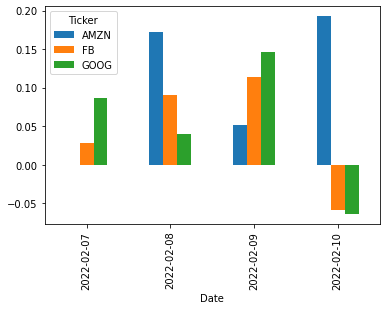

In [55]:
plt.figure(figsize=(10,8))

mean_df = df.groupby(['Ticker', 'Date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose()
mean_df.plot(kind = 'bar')
plt.show()